# Loan payback prediction using decision tree algorythm

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:/Users/Chamod/Desktop/tute/loan.csv' ,low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(['total_il_high_credit_limit'], inplace=True,axis=1)

In [5]:
to_drop = ['dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','total_cu_tl','inq_last_12m','acc_open_past_24mths']

In [6]:
df.drop(to_drop,inplace=True,axis=1)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [8]:
to_drop = [
'tot_hi_cred_lim','total_bal_ex_mort',
'total_bc_limit']

In [9]:
df.drop(to_drop,inplace=True,axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                  

In [11]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [12]:
to_drop = [
'mths_since_last_major_derog','next_pymnt_d',
'annual_inc_joint','inq_fi']
df.drop(to_drop,inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                  

In [13]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [14]:
to_drop = [
'grade','sub_grade',
'emp_title','pymnt_plan','url','desc','zip_code','addr_state']
df.drop(to_drop,inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   emp_length                      38642 non-null  object 
 9   home_ownership                  39717 non-null  object 
 10  annual_inc                      39717 non-null  float64
 11  verification_status             39717 non-null  object 
 12  issue_d                         

In [15]:
to_drop = [
'initial_list_status','id',
'member_id','issue_d','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util']
df.drop(to_drop,inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   funded_amnt                     39717 non-null  int64  
 2   funded_amnt_inv                 39717 non-null  float64
 3   term                            39717 non-null  object 
 4   int_rate                        39717 non-null  object 
 5   installment                     39717 non-null  float64
 6   emp_length                      38642 non-null  object 
 7   home_ownership                  39717 non-null  object 
 8   annual_inc                      39717 non-null  float64
 9   verification_status             39717 non-null  object 
 10  loan_status                     39717 non-null  object 
 11  purpose                         39717 non-null  object 
 12  title                           

In [16]:
 to_drop = [
'application_type','tax_liens',
'last_credit_pull_d','collections_12_mths_ex_med','total_rec_late_fee','total_rec_int','total_rec_prncp','out_prncp_inv','out_prncp','total_acc','title']
df.drop(to_drop,inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   funded_amnt                     39717 non-null  int64  
 2   funded_amnt_inv                 39717 non-null  float64
 3   term                            39717 non-null  object 
 4   int_rate                        39717 non-null  object 
 5   installment                     39717 non-null  float64
 6   emp_length                      38642 non-null  object 
 7   home_ownership                  39717 non-null  object 
 8   annual_inc                      39717 non-null  float64
 9   verification_status             39717 non-null  object 
 10  loan_status                     39717 non-null  object 
 11  purpose                         39717 non-null  object 
 12  dti                             

In [17]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [18]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [19]:
 to_drop = [
'num_rev_accts']
df.drop(to_drop,inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   funded_amnt                     39717 non-null  int64  
 2   funded_amnt_inv                 39717 non-null  float64
 3   term                            39717 non-null  object 
 4   int_rate                        39717 non-null  object 
 5   installment                     39717 non-null  float64
 6   emp_length                      38642 non-null  object 
 7   home_ownership                  39717 non-null  object 
 8   annual_inc                      39717 non-null  float64
 9   verification_status             39717 non-null  object 
 10  loan_status                     39717 non-null  object 
 11  purpose                         39717 non-null  object 
 12  dti                             

In [20]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
 to_drop = [
'num_op_rev_tl','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   funded_amnt                     39717 non-null  int64  
 2   funded_amnt_inv                 39717 non-null  float64
 3   term                            39717 non-null  object 
 4   int_rate                        39717 non-null  object 
 5   installment                     39717 non-null  float64
 6   emp_length                      38642 non-null  object 
 7   home_ownership                  39717 non-null  object 
 8   annual_inc                      39717 non-null  float64
 9   verification_status             39717 non-null  object 
 10  loan_status                     39717 non-null  object 
 11  purpose                         39717 non-null  object 
 12  dti                             

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [22]:
 to_drop = [
'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_bc_sats','num_bc_tl','num_il_tl']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   emp_length                38642 non-null  object 
 7   home_ownership            39717 non-null  object 
 8   annual_inc                39717 non-null  float64
 9   verification_status       39717 non-null  object 
 10  loan_status               39717 non-null  object 
 11  purpose                   39717 non-null  object 
 12  dti                       39717 non-null  float64
 13  total_pymnt               39717 non-null  float64
 14  total_

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_rev_tl,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [23]:
 to_drop = [
'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','num_actv_rev_tl']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   emp_length                38642 non-null  object 
 7   home_ownership            39717 non-null  object 
 8   annual_inc                39717 non-null  float64
 9   verification_status       39717 non-null  object 
 10  loan_status               39717 non-null  object 
 11  purpose                   39717 non-null  object 
 12  dti                       39717 non-null  float64
 13  total_pymnt               39717 non-null  float64
 14  total_

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,0.00,Jan-15,171.62,1,NaN,NaN,NaN,0.0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,1.11,Apr-13,119.66,1,NaN,NaN,NaN,0.0,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,0.00,Jun-14,649.91,1,NaN,NaN,NaN,0.0,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,0.00,Jan-15,357.48,1,NaN,NaN,NaN,0.0,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,0.00,May-16,67.79,1,NaN,NaN,NaN,0.0,0,0.0


In [24]:
 to_drop = [
'avg_cur_bal','avg_cur_bal','bc_util']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   emp_length                38642 non-null  object 
 7   home_ownership            39717 non-null  object 
 8   annual_inc                39717 non-null  float64
 9   verification_status       39717 non-null  object 
 10  loan_status               39717 non-null  object 
 11  purpose                   39717 non-null  object 
 12  dti                       39717 non-null  float64
 13  total_pymnt               39717 non-null  float64
 14  total_

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,5833.84,0.00,0.00,Jan-15,171.62,1,NaN,0.0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,1008.71,117.08,1.11,Apr-13,119.66,1,NaN,0.0,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,3005.67,0.00,0.00,Jun-14,649.91,1,NaN,0.0,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,12231.89,0.00,0.00,Jan-15,357.48,1,NaN,0.0,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,3513.33,0.00,0.00,May-16,67.79,1,NaN,0.0,0,0.0


In [25]:
 to_drop = [
'bc_open_to_buy']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt               39717 non-null  int64  
 2   funded_amnt_inv           39717 non-null  float64
 3   term                      39717 non-null  object 
 4   int_rate                  39717 non-null  object 
 5   installment               39717 non-null  float64
 6   emp_length                38642 non-null  object 
 7   home_ownership            39717 non-null  object 
 8   annual_inc                39717 non-null  float64
 9   verification_status       39717 non-null  object 
 10  loan_status               39717 non-null  object 
 11  purpose                   39717 non-null  object 
 12  dti                       39717 non-null  float64
 13  total_pymnt               39717 non-null  float64
 14  total_

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,...,5863.155187,5833.84,0.00,0.00,Jan-15,171.62,1,0.0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,...,1008.710000,1008.71,117.08,1.11,Apr-13,119.66,1,0.0,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,...,3005.666844,3005.67,0.00,0.00,Jun-14,649.91,1,0.0,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,...,12231.890000,12231.89,0.00,0.00,Jan-15,357.48,1,0.0,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,...,3513.330000,3513.33,0.00,0.00,May-16,67.79,1,0.0,0,0.0


In [26]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [27]:
df.to_csv(r"C:/Users/Chamod/Desktop/tute/clean3.csv")

In [28]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [29]:
 to_drop = [
'chargeoff_within_12_mths','pub_rec_bankruptcies','delinq_amnt']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   emp_length               38642 non-null  object 
 7   home_ownership           39717 non-null  object 
 8   annual_inc               39717 non-null  float64
 9   verification_status      39717 non-null  object 
 10  loan_status              39717 non-null  object 
 11  purpose                  39717 non-null  object 
 12  dti                      39717 non-null  float64
 13  total_pymnt              39717 non-null  float64
 14  total_pymnt_inv       

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,0.00,0.00,Jan-15,171.62,1
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,117.08,1.11,Apr-13,119.66,1
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,0.00,0.00,Jun-14,649.91,1
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,0.00,0.00,Jan-15,357.48,1
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,other,17.94,3513.330000,3513.33,0.00,0.00,May-16,67.79,1


In [30]:
df.term.unique()
replace_term = {'term':{' 36 months':1,' 60 months':2}}
df.replace(replace_term,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,0.00,0.00,Jan-15,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,117.08,1.11,Apr-13,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,0.00,0.00,Jun-14,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,0.00,0.00,Jan-15,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,other,17.94,3513.330000,3513.33,0.00,0.00,May-16,67.79,1


In [31]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [32]:
replace_verfication_status = {"verification_status":{'Verified':1,'Source Verified':2,'Not Verified':3}}
df.replace(replace_verfication_status,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,10+ years,RENT,24000.0,1,Fully Paid,credit_card,27.65,5863.155187,5833.84,0.00,0.00,Jan-15,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,< 1 year,RENT,30000.0,2,Charged Off,car,1.00,1008.710000,1008.71,117.08,1.11,Apr-13,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,10+ years,RENT,12252.0,3,Fully Paid,small_business,8.72,3005.666844,3005.67,0.00,0.00,Jun-14,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,10+ years,RENT,49200.0,2,Fully Paid,other,20.00,12231.890000,12231.89,0.00,0.00,Jan-15,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,1 year,RENT,80000.0,2,Current,other,17.94,3513.330000,3513.33,0.00,0.00,May-16,67.79,1


In [33]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [34]:
replace_loan_status = {"loan_status":{'Fully Paid':1,'Charged Off':2,'Current':3}}
df.replace(replace_loan_status,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,10+ years,RENT,24000.0,1,1,credit_card,27.65,5863.155187,5833.84,0.00,0.00,Jan-15,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,< 1 year,RENT,30000.0,2,2,car,1.00,1008.710000,1008.71,117.08,1.11,Apr-13,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,10+ years,RENT,12252.0,3,1,small_business,8.72,3005.666844,3005.67,0.00,0.00,Jun-14,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,10+ years,RENT,49200.0,2,1,other,20.00,12231.890000,12231.89,0.00,0.00,Jan-15,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,1 year,RENT,80000.0,2,3,other,17.94,3513.330000,3513.33,0.00,0.00,May-16,67.79,1


In [35]:
 to_drop = [
'last_pymnt_d']
df.drop(to_drop,inplace=True,axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int64  
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   emp_length               38642 non-null  object 
 7   home_ownership           39717 non-null  object 
 8   annual_inc               39717 non-null  float64
 9   verification_status      39717 non-null  int64  
 10  loan_status              39717 non-null  int64  
 11  purpose                  39717 non-null  object 
 12  dti                      39717 non-null  float64
 13  total_pymnt              39717 non-null  float64
 14  total_pymnt_inv       

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,10+ years,RENT,24000.0,1,1,credit_card,27.65,5863.155187,5833.84,0.00,0.00,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,< 1 year,RENT,30000.0,2,2,car,1.00,1008.710000,1008.71,117.08,1.11,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,10+ years,RENT,12252.0,3,1,small_business,8.72,3005.666844,3005.67,0.00,0.00,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,10+ years,RENT,49200.0,2,1,other,20.00,12231.890000,12231.89,0.00,0.00,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,1 year,RENT,80000.0,2,3,other,17.94,3513.330000,3513.33,0.00,0.00,67.79,1


In [36]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,10+ years,RENT,24000.0,1,1,credit_card,27.65,5863.155187,5833.84,0.00,0.00,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,< 1 year,RENT,30000.0,2,2,car,1.00,1008.710000,1008.71,117.08,1.11,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,10+ years,RENT,12252.0,3,1,small_business,8.72,3005.666844,3005.67,0.00,0.00,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,10+ years,RENT,49200.0,2,1,other,20.00,12231.890000,12231.89,0.00,0.00,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,1 year,RENT,80000.0,2,3,other,17.94,3513.330000,3513.33,0.00,0.00,67.79,1


In [37]:
 to_drop = [
'emp_length']
df.drop(to_drop,inplace=True,axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,RENT,24000.0,1,1,credit_card,27.65,5863.155187,5833.84,0.00,0.00,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,RENT,30000.0,2,2,car,1.00,1008.710000,1008.71,117.08,1.11,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,RENT,12252.0,3,1,small_business,8.72,3005.666844,3005.67,0.00,0.00,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,RENT,49200.0,2,1,other,20.00,12231.890000,12231.89,0.00,0.00,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,RENT,80000.0,2,3,other,17.94,3513.330000,3513.33,0.00,0.00,67.79,1


In [38]:
 df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [39]:
replace_home_ownership = {"home_ownership":{'RENT':1,'OWN':2,'MORTGAGE':3,'OTHER':4,'NONE':5}}
df.replace(replace_home_ownership,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
0,5000,5000,4975.0,1,10.65%,162.87,1,24000.0,1,1,credit_card,27.65,5863.155187,5833.84,0.00,0.00,171.62,1
1,2500,2500,2500.0,2,15.27%,59.83,1,30000.0,2,2,car,1.00,1008.710000,1008.71,117.08,1.11,119.66,1
2,2400,2400,2400.0,1,15.96%,84.33,1,12252.0,3,1,small_business,8.72,3005.666844,3005.67,0.00,0.00,649.91,1
3,10000,10000,10000.0,1,13.49%,339.31,1,49200.0,2,1,other,20.00,12231.890000,12231.89,0.00,0.00,357.48,1
4,3000,3000,3000.0,2,12.69%,67.79,1,80000.0,2,3,other,17.94,3513.330000,3513.33,0.00,0.00,67.79,1


In [40]:
df2 = pd.get_dummies(df,columns=['purpose'],drop_first=True)
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,4975.0,1,10.65%,162.87,1,24000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,2,15.27%,59.83,1,30000.0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,1,15.96%,84.33,1,12252.0,3,1,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,1,13.49%,339.31,1,49200.0,2,1,...,0,0,0,0,0,1,0,0,0,0
4,3000,3000,3000.0,2,12.69%,67.79,1,80000.0,2,3,...,0,0,0,0,0,1,0,0,0,0


In [41]:
df2['int_rate'] = list(map(lambda x: x[:-1], df2['int_rate'].values))
df2['int_rate'] = [float(x) for x in df2['int_rate'].values]
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,4975.0,1,10.65,162.87,1,24000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,2,15.27,59.83,1,30000.0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,1,15.96,84.33,1,12252.0,3,1,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,1,13.49,339.31,1,49200.0,2,1,...,0,0,0,0,0,1,0,0,0,0
4,3000,3000,3000.0,2,12.69,67.79,1,80000.0,2,3,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df2['int_rate'] = df2['int_rate'].apply(lambda x : x/100)
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,5000,4975.0,1,0.1065,162.87,1,24000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,2,0.1527,59.83,1,30000.0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,1,0.1596,84.33,1,12252.0,3,1,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,1,0.1349,339.31,1,49200.0,2,1,...,0,0,0,0,0,1,0,0,0,0
4,3000,3000,3000.0,2,0.1269,67.79,1,80000.0,2,3,...,0,0,0,0,0,1,0,0,0,0


In [43]:

from sklearn.model_selection  import train_test_split

In [44]:
X = df2.drop('loan_status',axis=1)
y = df2['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

# Decision tree


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()

## Training a Decision Tree Model

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Eveluate the results of loan payback prediction on Decion tree algorithm

In [48]:
predictions = dtree.predict(X_test)


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.99      0.98      0.99      9871
           2       0.96      0.96      0.96      1711
           3       0.68      0.73      0.70       334

    accuracy                           0.97     11916
   macro avg       0.88      0.89      0.88     11916
weighted avg       0.97      0.97      0.97     11916



In [51]:
print(confusion_matrix(y_test,predictions))

[[9714   53  104]
 [  57 1643   11]
 [  81    9  244]]


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Accuracy:",accuracy_score(y_test, predictions))

Accuracy: 0.9735649546827795


In [54]:
df2.to_csv(r'C:/Users/Chamod/Desktop/tute/clean_final.csv')

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
# from sklearn.tree import export_graphviz
# export_graphviz(model, 'tree.dot')


In [57]:
from sklearn import tree
import matplotlib.pyplot as plt
decision_tree = tree.export_graphviz(dtree,out_file='tree.dot',feature_names=X_train.columns,max_depth=5,filled=True)

In [58]:
!pip install graphviz

In [59]:
!dot -Tpng tree.dot -o tree.png


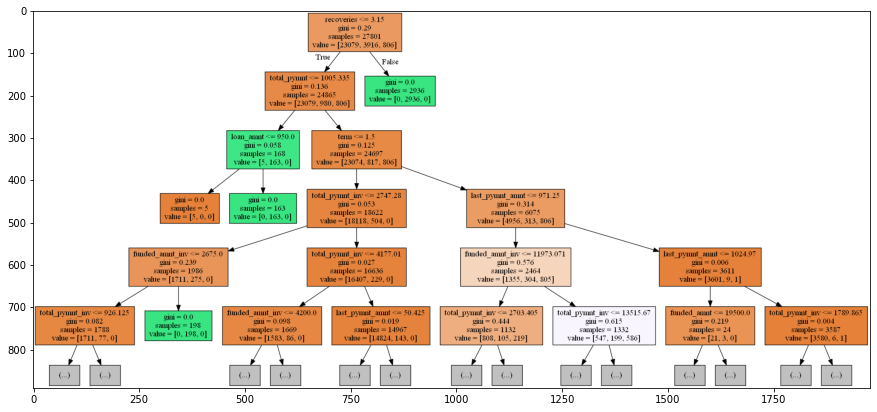

In [60]:
decision_tree
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)